### The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [1923]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Overview
The data has been split into two groups:

training set (train.csv)
test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

<img src="expla.png">

<img src="notes.png">

In [1924]:
train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1925]:
train_data.shape

(891, 12)

In [1926]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1927]:
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [1928]:
test_data.shape

(418, 11)

In [1929]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [1930]:
gender = pd.read_csv('gender_submission.csv')
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [1931]:
gender.shape

(418, 2)

In [1932]:
gender.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

## Manipulation Data

## Train Data

In [1933]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1934]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1935]:
## coba hilangkan cabin

In [1936]:
train_data_new =  train_data.drop("Cabin", axis = 1)
train_data_new.shape

(891, 11)

In [1937]:
train_data_new = train_data_new.dropna()
train_data_new.shape

(712, 11)

In [1938]:
train_data_new.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [1939]:
train_data_new.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [1940]:
train_data_new.Sex = train_data_new.Sex.map({"male":0, "female":1})
train_data_new.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


In [1941]:
train_data_new.Embarked = train_data_new.Embarked.map({"C":0, "Q":1, "S":2})
train_data_new.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2


## Test Data

In [1942]:
test = test_data.merge(gender, how='outer', on='PassengerId')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [1943]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

In [1944]:
test_new = test.drop('Cabin', axis = 1)
test_new.head()
#when

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,1


In [1945]:
test_new.shape

(418, 11)

In [1946]:
test_new.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
Survived        0
dtype: int64

In [1947]:
test_new.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,1


In [1948]:
test_new.Sex = test_new.Sex.map({"male":0, "female":1})
test_new.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,S,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,S,1


In [1949]:
test_new.Embarked = test_new.Embarked.map({"C":0, "Q":1, "S":2})
test_new.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,2,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,1,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,2,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,2,1


## Exploratory Data Analysis

## Bivariate Analysis

In [1950]:
train_data_new.to_csv('graph.csv', index=False)
train_data_new_graph= pd.read_csv('graph.csv')
train_data_new_graph.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2


In [1951]:
train_data_new.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,0.363764,29.642093,0.514045,0.432584,34.567251,1.595506
std,258.683191,0.491139,0.836854,0.481420,14.492933,0.930692,0.854181,52.938648,0.779038
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,8.050000,2.000000
50%,445.000000,0.000000,2.000000,0.000000,28.000000,0.000000,0.000000,15.645850,2.000000
75%,677.250000,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200,2.000000


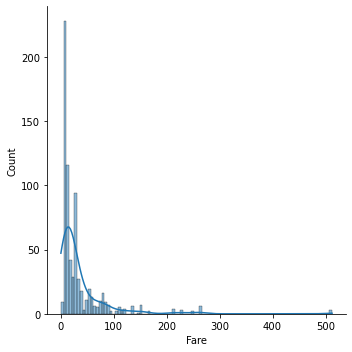

In [1952]:
sns.displot(train_data_new_graph['Fare'], kde = 'true', bins = 100)

In [1953]:
train_data_new.loc[ train_data_new['Fare'] <= 7.91, 'Fare'] = 0
train_data_new.loc[(train_data_new['Fare'] > 7.91) & (train_data_new['Fare'] <= 14.454), 'Fare'] = 1
train_data_new.loc[(train_data_new['Fare'] > 14.454) & (train_data_new['Fare'] <= 31), 'Fare']   = 2
train_data_new.loc[ train_data_new['Fare'] > 31, 'Fare'] = 3
train_data_new['Fare'] = train_data_new['Fare'].astype(int)

In [1954]:
train_data_new.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,3,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,3,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,1,2


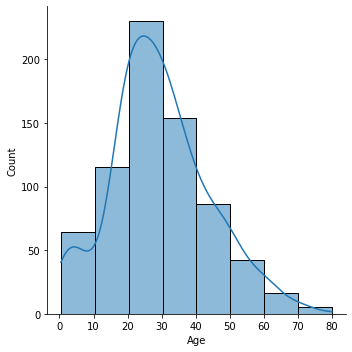

In [1955]:
sns.displot(train_data_new_graph['Age'], kde = 'true', bins = 8)

In [1956]:
train_data_new.loc[ train_data_new['Age'] <= 10, 'Age'] = 0
train_data_new.loc[(train_data_new['Age'] > 10) & (train_data_new['Age'] <= 15), 'Age'] = 1
train_data_new.loc[(train_data_new['Age'] > 15) & (train_data_new['Age'] <= 20), 'Age']   = 2
train_data_new.loc[(train_data_new['Age'] > 20) & (train_data_new['Age'] <= 25), 'Age']   = 3
train_data_new.loc[(train_data_new['Age'] > 25) & (train_data_new['Age'] <= 30), 'Age']   = 4
train_data_new.loc[(train_data_new['Age'] > 30) & (train_data_new['Age'] <= 35), 'Age']   = 5
train_data_new.loc[(train_data_new['Age'] > 35) & (train_data_new['Age'] <= 40), 'Age']   = 6
train_data_new.loc[(train_data_new['Age'] > 40) & (train_data_new['Age'] <= 50), 'Age']   = 7
train_data_new.loc[(train_data_new['Age'] > 50) & (train_data_new['Age'] <= 60), 'Age']   = 8
train_data_new.loc[ train_data_new['Age'] > 60, 'Age'] = 9
train_data_new['Age'] = train_data_new['Age'].astype(int)

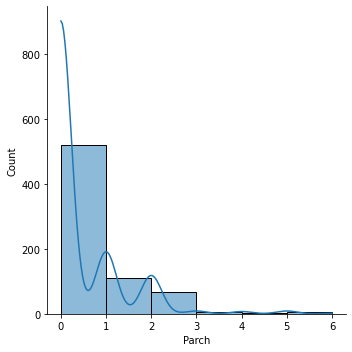

In [1957]:
sns.displot(train_data_new_graph['Parch'], kde = 'true', bins = 6)

In [1958]:
train_data_new.loc[ train_data_new['Parch'] <= 1, 'Parch'] = 0
train_data_new.loc[(train_data_new['Parch'] > 1) & (train_data_new['Parch'] <= 3), 'Parch'] = 1
train_data_new.loc[ train_data_new['Parch'] > 3, 'Parch'] = 3
train_data_new['Parch'] = train_data_new['Parch'].astype(int)

In [1959]:
train_data_new.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,3,1,0,A/5 21171,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,6,1,0,PC 17599,3,0
2,3,1,3,"Heikkinen, Miss. Laina",1,4,0,0,STON/O2. 3101282,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,5,1,0,113803,3,2
4,5,0,3,"Allen, Mr. William Henry",0,5,0,0,373450,1,2


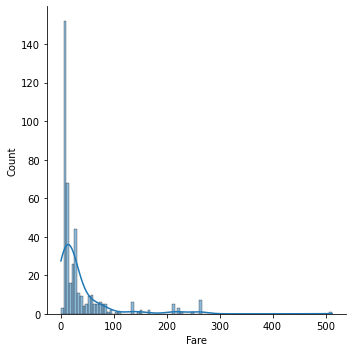

In [1960]:
sns.displot(test_new['Fare'], kde = 'true', bins = 100)

In [1961]:
test_new.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
Survived        0
dtype: int64

In [1962]:
test_new = test_new.fillna(0)

In [1963]:
test_new.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
dtype: int64

In [1964]:
test_new.loc[ test_new['Fare'] <= 7.91, 'Fare'] = 0
test_new.loc[(test_new['Fare'] > 7.91) & (test_new['Fare'] <= 14.454), 'Fare'] = 1
test_new.loc[(test_new['Fare'] > 14.454) & (test_new['Fare'] <= 31), 'Fare']   = 2
test_new.loc[ test_new['Fare'] > 31, 'Fare'] = 3
test_new['Fare'] = test_new['Fare'].astype(int)

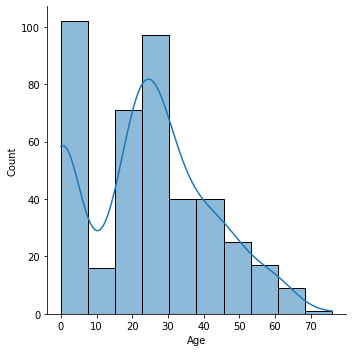

In [1965]:
sns.displot(test_new['Age'], kde = 'true', bins = 10)

In [1966]:
test_new.loc[ test_new['Age'] <= 10, 'Age'] = 0
test_new.loc[(test_new['Age'] > 10) & (test_new['Age'] <= 20), 'Age'] = 1
test_new.loc[(test_new['Age'] > 20) & (test_new['Age'] <= 30), 'Age']   = 3
test_new.loc[(test_new['Age'] > 30) & (test_new['Age'] <= 40), 'Age']   = 5
test_new.loc[(test_new['Age'] > 40) & (test_new['Age'] <= 50), 'Age']   = 7
test_new.loc[(test_new['Age'] > 50) & (test_new['Age'] <= 60), 'Age']   = 8
test_new.loc[ test_new['Age'] > 60, 'Age'] = 9
test_new['Age'] = test_new['Age'].astype(int)

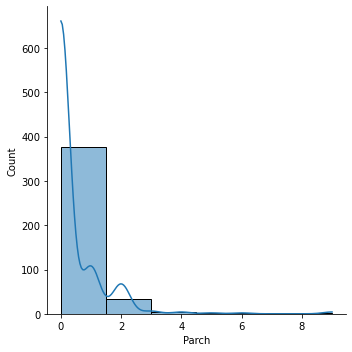

In [1967]:
sns.displot(test_new['Parch'], kde = 'true', bins = 6)

In [1968]:
test_new.loc[ test_new['Parch'] <= 1, 'Parch'] = 0
test_new.loc[(test_new['Parch'] > 1) & (test_new['Parch'] <= 3), 'Parch'] = 1
test_new.loc[ test_new['Parch'] > 3, 'Parch'] = 3
test_new['Parch'] = test_new['Parch'].astype(int)

## Multivariate Analysis

<AxesSubplot:>

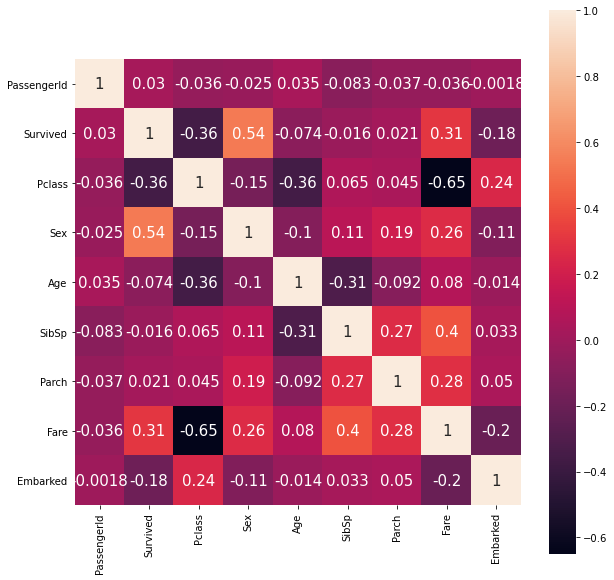

In [1969]:
corr = train_data_new.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr, cbar = True, square = True, annot = True, annot_kws = {'size': 15})

data yang memiliki hubungan korelasi kuat dengan survived (> 0.1 dan -0.1) adalah 
1. Sex
2. Pclass
3. Fare
4. Embarked

In [1970]:
# corr = test_new.corr()
# plt.figure(figsize = (10,10))
# sns.heatmap(corr, cbar = True, square = True, annot = True, annot_kws = {'size': 15})

## Visualization

In [1971]:
train_data_new_graph.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2


In [1972]:
train_data_new.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,3,1,0,A/5 21171,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,6,1,0,PC 17599,3,0
2,3,1,3,"Heikkinen, Miss. Laina",1,4,0,0,STON/O2. 3101282,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,5,1,0,113803,3,2
4,5,0,3,"Allen, Mr. William Henry",0,5,0,0,373450,1,2


In [1973]:
# memberikan penjelasan untuk variabel kategori
train_data_new_graph["Sex"].replace({0: "Female", 1: "Male"}, inplace=True)        
train_data_new_graph["Pclass"].replace({1: "First Class", 2:"Second Class", 3:"Third Class"},inplace=True)
train_data_new_graph["Embarked"].replace({0: "Cherbourg", 1: "Queenstown",2:"Southampton"},inplace=True)
train_data_new_graph["Survived"].replace({0: "Not Survived", 1: "Survive"},inplace=True)

train_data_new_graph.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,Not Survived,Third Class,"Braund, Mr. Owen Harris",Female,22.0,1,0,A/5 21171,7.2500,Southampton
1,2,Survive,First Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Male,38.0,1,0,PC 17599,71.2833,Cherbourg
2,3,Survive,Third Class,"Heikkinen, Miss. Laina",Male,26.0,0,0,STON/O2. 3101282,7.9250,Southampton
3,4,Survive,First Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Male,35.0,1,0,113803,53.1000,Southampton
4,5,Not Survived,Third Class,"Allen, Mr. William Henry",Female,35.0,0,0,373450,8.0500,Southampton


<Figure size 720x360 with 0 Axes>

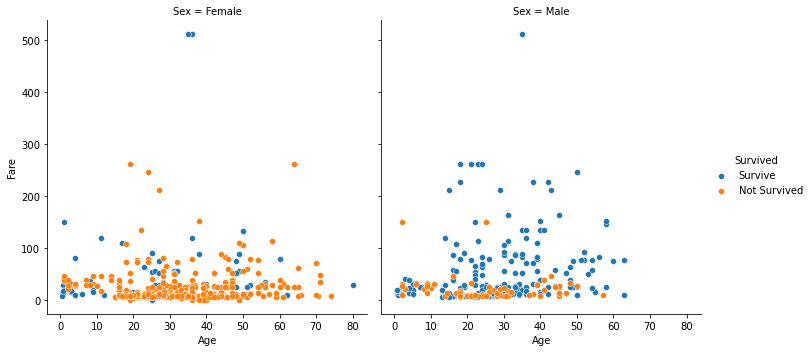

In [1974]:
g = plt.figure(figsize=(10, 5))

hue_order = ["Survive", "Not Survived"]
g = sns.FacetGrid(train_data_new_graph, col="Sex", hue="Survived", hue_order=hue_order, height = 5)
g.map(sns.scatterplot, "Age", "Fare", alpha=1)
g.add_legend()

<Figure size 720x360 with 0 Axes>

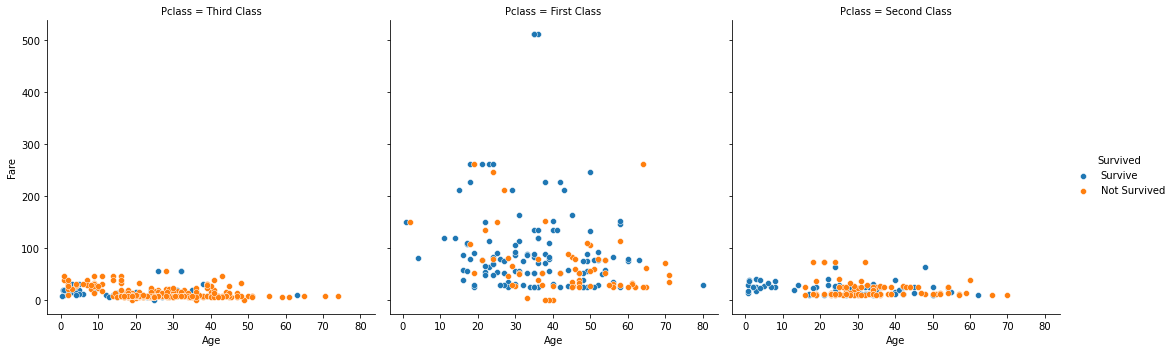

In [1975]:
g = plt.figure(figsize=(10, 5))

hue_order = ["Survive", "Not Survived"]
g = sns.FacetGrid(train_data_new_graph, col="Pclass", hue="Survived", hue_order=hue_order, height = 5)
g.map(sns.scatterplot, "Age", "Fare", alpha=1)
g.add_legend()

<Figure size 720x360 with 0 Axes>

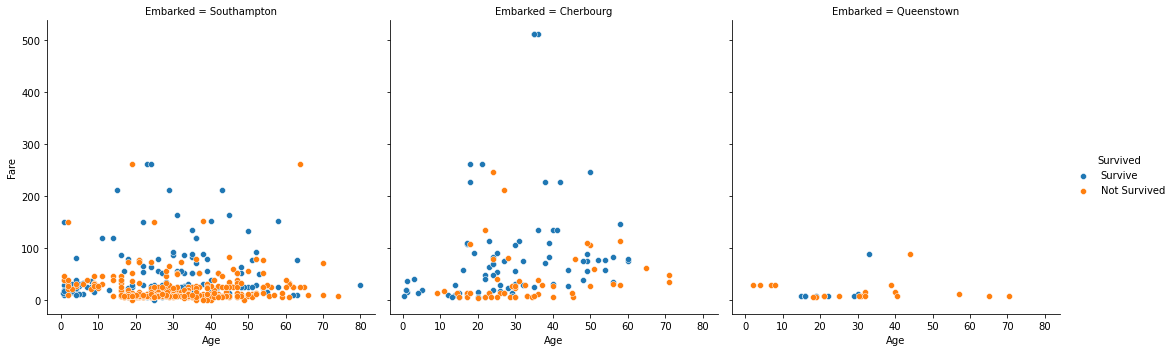

In [1976]:
g = plt.figure(figsize=(10, 5))

hue_order = ["Survive", "Not Survived"]
g = sns.FacetGrid(train_data_new_graph, col="Embarked", hue="Survived", hue_order=hue_order, height = 5)
g.map(sns.scatterplot, "Age", "Fare", alpha=1)
g.add_legend()

<Figure size 720x360 with 0 Axes>

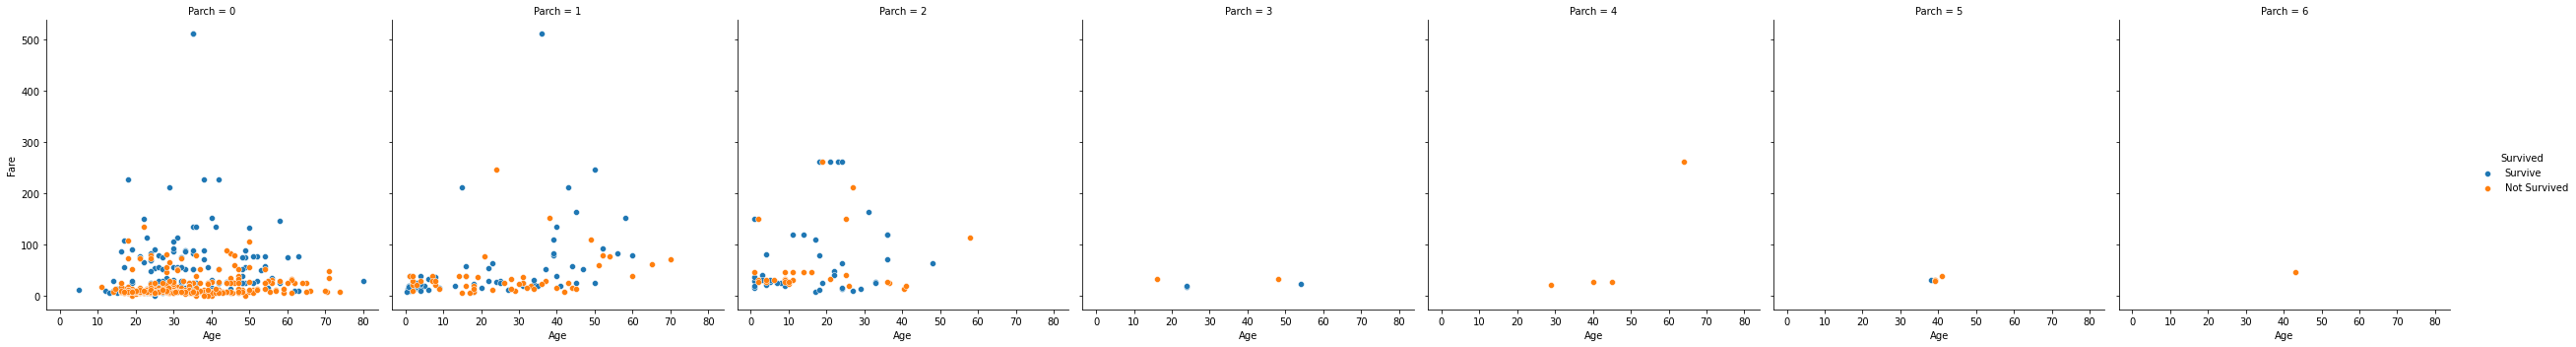

In [1977]:
g = plt.figure(figsize=(10, 5))

hue_order = ["Survive", "Not Survived"]
g = sns.FacetGrid(train_data_new_graph, col="Parch", hue="Survived", hue_order=hue_order, height = 5)
g.map(sns.scatterplot, "Age", "Fare", alpha=1)
g.add_legend()

In [1978]:
train_data_new.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,3,1,0,A/5 21171,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,6,1,0,PC 17599,3,0
2,3,1,3,"Heikkinen, Miss. Laina",1,4,0,0,STON/O2. 3101282,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,5,1,0,113803,3,2
4,5,0,3,"Allen, Mr. William Henry",0,5,0,0,373450,1,2


## Data Preparation

In [1979]:
train_data_new.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,3,1,0,A/5 21171,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,6,1,0,PC 17599,3,0
2,3,1,3,"Heikkinen, Miss. Laina",1,4,0,0,STON/O2. 3101282,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,5,1,0,113803,3,2
4,5,0,3,"Allen, Mr. William Henry",0,5,0,0,373450,1,2


In [1980]:
from sklearn.model_selection import train_test_split

X_train = train_data_new.drop(["Survived","Name", "Ticket"], axis=1)
y_train = train_data_new["Survived"]

X_test = test_new.drop(["Survived","Name", "Ticket"], axis=1)
y_test = test_new["Survived"]

In [1981]:
X_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,5,0,0,0,1
1,893,3,1,7,1,0,0,2
2,894,2,0,9,0,0,1,1
3,895,3,0,3,0,0,1,2
4,896,3,1,3,1,0,1,2


## Pre Processing

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_test_scal= scaler.transform(X_test)

In [1982]:
#from sklearn.feature_selection import SelectKBest, chi2

#selector = SelectKBest(chi2, k = 4)
#selector.fit(X_train, y_train)
#X_train_new = selector.transform(X_train)
#X_test_new = selector.transform(X_test)

X_train_new = X_train
X_test_new = X_test

In [1983]:
X_test_new.shape

(418, 8)

In [1984]:
X_test_new.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,5,0,0,0,1
1,893,3,1,7,1,0,0,2
2,894,2,0,9,0,0,1,1
3,895,3,0,3,0,0,1,2
4,896,3,1,3,1,0,1,2


In [1985]:
selector.get_support()

array([False,  True,  True, False, False, False,  True,  True])

In [1986]:
col_names = [i for i,j in zip(X.columns,selector.get_support()) if j]
col_names

['Pclass', 'Sex', 'Fare', 'Embarked']

## Using ML from DT Sense

In [1987]:
from sklearn.naive_bayes import GaussianNB

clf1 = GaussianNB()
clf1.fit(X_train_new, y_train)
y_pred1 = clf1.predict(X_test_new)

#output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
#output.to_csv('_submission.csv', index=False)

In [1988]:
from sklearn.tree import DecisionTreeClassifier

clf2 = DecisionTreeClassifier(criterion='entropy')
clf2.fit(X_train_new, y_train)
y_pred2 = clf2.predict(X_test_new)

In [1989]:
from sklearn.neighbors import KNeighborsClassifier

clf3 = KNeighborsClassifier(n_neighbors=5, metric = 'euclidean')
clf3.fit(X_train_new, y_train)
y_pred3 = clf3.predict(X_test_new)

In [1990]:
from sklearn.svm import SVC

clf4 = SVC(kernel = 'linear')
clf4.fit(X_train_new, y_train)
y_pred4 = clf4.predict(X_test_new)

In [1991]:
from sklearn.neural_network import MLPClassifier

clf5 = MLPClassifier(activation = 'relu', hidden_layer_sizes= (100,100), max_iter= 2000)
clf5.fit(X_train_new, y_train)
y_pred5 = clf5.predict(X_test_new)

In [1992]:
from sklearn.ensemble import RandomForestClassifier

clf6= RandomForestClassifier(n_estimators=200, max_depth=3, random_state=3, criterion='entropy')
clf6.fit(X_train_new, y_train)
y_pred6 = clf6.predict(X_test_new)

## Evaluation

In [1993]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [1994]:
print('Model 1 = Probabilistic Model : Naive Bayes Classifier')
print('accuracy score :', accuracy_score(y_test, y_pred1))
print('precision score :', precision_score(y_test, y_pred1, average = 'weighted'))
print('recall score :', recall_score(y_test, y_pred1, average = 'weighted'))
print('f1 score :', f1_score(y_test, y_pred1, average = 'weighted'))
print(" ")


print('Model 2 = Model Tree Based : Decision Tree')
print('accuracy score :', accuracy_score(y_test, y_pred2))
print('precision score :', precision_score(y_test, y_pred2, average = 'weighted'))
print('recall score :', recall_score(y_test, y_pred2, average = 'weighted'))
print('f1 score :', f1_score(y_test, y_pred2, average = 'weighted'))
print(" ")


print('Model 3 = Model Vector Space Based : K-Nearest Neighbors')
print('accuracy score :', accuracy_score(y_test, y_pred3))
print('precision score :', precision_score(y_test, y_pred3, average = 'weighted'))
print('recall score :', recall_score(y_test, y_pred3, average = 'weighted'))
print('f1 score :', f1_score(y_test, y_pred3, average = 'weighted'))
print(" ")


print('Model 4 = Model Vector Space Based : Support Vector Machine')
print('accuracy score :', accuracy_score(y_test, y_pred4))
print('precision score :', precision_score(y_test, y_pred4, average = 'weighted'))
print('recall score :', recall_score(y_test, y_pred4, average = 'weighted'))
print('f1 score :', f1_score(y_test, y_pred4, average = 'weighted'))
print(" ")


print('Model 5 = Model Neural Network')
print('accuracy score :', accuracy_score(y_test, y_pred5))
print('precision score :', precision_score(y_test, y_pred5, average = 'weighted'))
print('recall score :', recall_score(y_test, y_pred5, average = 'weighted'))
print('f1 score :', f1_score(y_test, y_pred5, average = 'weighted'))
print(" ")

print('Model 6 = Random Forest')
print('accuracy score :', accuracy_score(y_test, y_pred6))
print('precision score :', precision_score(y_test, y_pred6, average = 'weighted'))
print('recall score :', recall_score(y_test, y_pred6, average = 'weighted'))
print('f1 score :', f1_score(y_test, y_pred6, average = 'weighted'))


Model 1 = Probabilistic Model : Naive Bayes Classifier
accuracy score : 0.8325358851674641
precision score : 0.8569840712697856
recall score : 0.8325358851674641
f1 score : 0.8355730852904397
 
Model 2 = Model Tree Based : Decision Tree
accuracy score : 0.645933014354067
precision score : 0.6545108225108225
recall score : 0.645933014354067
f1 score : 0.6492952783650456
 
Model 3 = Model Vector Space Based : K-Nearest Neighbors
accuracy score : 0.6363636363636364
precision score : 0.40495867768595045
recall score : 0.6363636363636364
f1 score : 0.4949494949494949
 
Model 4 = Model Vector Space Based : Support Vector Machine
accuracy score : 1.0
precision score : 1.0
recall score : 1.0
f1 score : 1.0
 
Model 5 = Model Neural Network
accuracy score : 0.84688995215311
precision score : 0.8490136261948342
recall score : 0.84688995215311
f1 score : 0.8422270262070013
 
Model 6 = Random Forest
accuracy score : 0.8516746411483254
precision score : 0.8559965953206419
recall score : 0.8516746411

C:\Users\Hem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1995]:
output = pd.DataFrame({'PassengerId': test_new.PassengerId, 'Survived': y_pred1})
output.to_csv('seven_submission.csv', index=False)